In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Problem 1

# Problem 2

In [5]:
df = pd.DataFrame (np.array([[1,0], [2,1/36], [3,2/36], [4, 3/36], [5, 4/36], [6, 5/36], [7, 6/36], [8, 5/36], [9, 4/36],[10, 3/36], [11, 2/36], [12, 1/36]]), columns=['Sum', 'Probability'])
df

,Sum,Probability
0,1.0,0.000000
1,2.0,0.027778
2,3.0,0.055556
3,4.0,0.083333
4,5.0,0.111111
5,6.0,0.138889
6,7.0,0.166667
7,8.0,0.138889
8,9.0,0.111111
9,10.0,0.083333


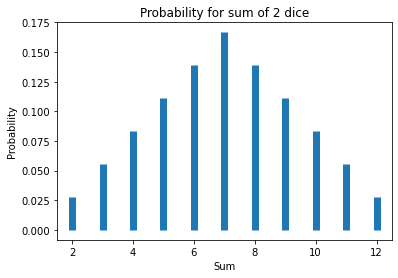

In [6]:
prob = np.array([1/6] * 6)
sum_p = np.convolve(prob, prob)
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.title("Probability for sum of 2 dice")
plt.vlines(range(2, 13), 0, sum_p, linewidth = 7)

possible values of the sum of two dice are 2,3,4,5,6,7,8,9,10,11,12. Sum 2 = 1+1, only one combination can get this result, the possibility is 1/36. and then 3 = 1+2 or 2+1, then two combinations can get this result, then the possibility is 2/36. And then 4 = 1+3 or 2+2 or 3+1, three combinations can get this result, then the possibility is 3/36. Just like these, the other possibilities at next are respectly 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36.

# Problem 3

In [7]:
mean = np.sum (np.arange(2, 13) * sum_p)
mean

6.999999999999998

In [8]:
variance = np.sum((np.arange(2, 13) - mean)**2 * sum_p)
variance

5.833333333333333

## Problem 4

Text(0, 0.5, 'probability')

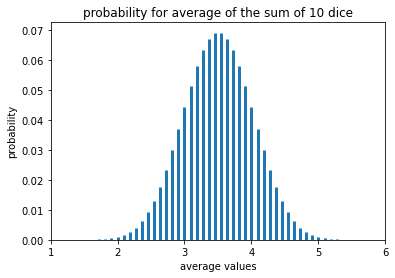

In [9]:
avgp = prob
for i in range(10):
    avgp = np.convolve(avgp, prob)

x = np.linspace(1, 6, len(avgp))
plt.vlines(x, 0, avgp, linewidth = 3);
plt.xlim(1, 6)
plt.ylim(0)
plt.title("probability for average of the sum of 10 dice")
plt.xlabel("average values")
plt.ylabel("probability")

It is not the Guassian distribution because it is not a continous probability distribution. we only have ten dices to calculate average, and the average values is not continous, it is discrete. 

# Problem 5

Text(0.5, 1.0, 'Sum of 2 Gaussians')

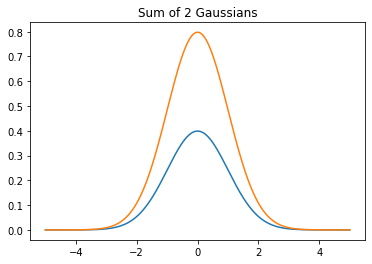

In [10]:
dist = stats.norm()
x = np.linspace(-5, 5, 1000)
fig, ax_1 = plt.subplots(1, 1)
ax_1.plot(x, dist.pdf(x))
ax_1.plot(x, dist.pdf(x) + dist.pdf(x))
ax_1.set_title("Sum of 2 Gaussians")

The graph of the sum is still looks Guassian distribution.

Text(0.5, 1.0, 'Convolution of 2 Gaussians')

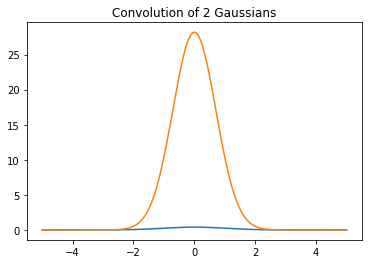

In [11]:
fig, ax_2 = plt.subplots(1, 1)
ax_2.plot(x, dist.pdf(x))
avg = np.convolve(dist.pdf(x), dist.pdf(x))
ax_2.plot(np.linspace(-5, 5, len(avg)), avg)
ax_2.set_title("Convolution of 2 Gaussians")


It still looks like a Gaussian distribution.
Next, we will look at the standard deviation. The semilog plot will help us have a better look of the standard deviation

Text(0.5, 1.0, 'semi-log graph of the sum')

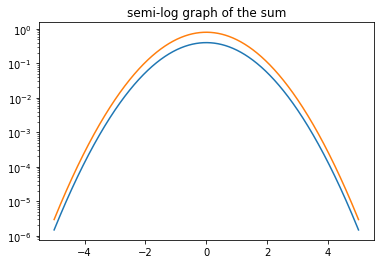

In [12]:
fig, ax_3 = plt.subplots(1,1)
ax_3.plot(x, dist.pdf(x))
ax_3.plot(x, dist.pdf(x) + dist.pdf(x))
plt.yscale('log')
ax_3.set_title("semilog graph of the sum")

standard deviation didn't change.

Text(0.5, 1.0, 'semi-log graph of the average')

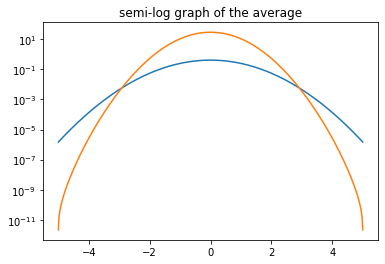

In [13]:
fig, ax_4 = plt.subplots(1, 1)
ax_4.plot(x, dist.pdf(x))
ax_4.plot(np.linspace(-5, 5, len(avg)), avg)
plt.yscale('log')
ax_4.set_title("semi-log graph of the average")

standard deviation is getting smaller.

it is clear from the parabolas that both the sum and the convolution of a Gaussian PDF are both also Gaussian PDF.
This is an important result because it tells us that reduce the standard deviation simply by averaging independent measurements.